### **Lista 4**
##### Rafał Głodek
***

**Zadanie 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

In [2]:
f1 = lambda x: np.tan(np.pi - x) - x

In [3]:
def bisection(f, a, b, error):
    fa, fb = f(a), f(b)
    if fa == 0:
        return a
    if fb == 0:
        return b
    if fa * fb > 0:
        raise(ValueError("Żle dobrany przedział. Miejsce zerowe znajduje się poza nim."))
    else:
        m = (a + b) / 2
        fm = f(m)
        max_iter = int(math.ceil(math.log(abs(a-b)/error, 2)))
        num_add_mult = 11 #f(a) = 2, f(b) = 2 f*a * fb = 1, m = 2, fm = 2, max_iter = 2
        num_iter = 1
        for _ in range(max_iter):
            if fm * fb < 0:
                a, b = m, b
                fa = fm
            elif fa * fm < 0:
                a, b = a, m
                fb = fm
            m = (a + b) / 2
            fm = f(m)
            num_iter += 1
            num_add_mult += 6 #fm*fb = 1, fa * f, = 1, m = 2, fm = 2
            if abs(fm) < error:
                return m, fm, num_iter, num_add_mult
        return m, fm, num_iter, num_add_mult

In [4]:
x, fm, num1, num2 = bisection(f1, 1.7, 2.8, 1e-8)

In [5]:
print(f"Rozwiązanie to: x = {x:6.4f}\nf(x) = {fm}\nLiczba iteracji: {num1}\nLiczba dodawań i mnożeń: {num2}")

Rozwiązanie to: x = 2.0288
f(x) = 6.53308918074913e-09
Liczba iteracji: 28
Liczba dodawań i mnożeń: 173


In [6]:
def brent(f, a, b, error):
    fa, fb = f(a), f(b)
    if fa == 0:
        return a
    if fb == 0:
        return b
    if fa * fb > 0:
        raise ValueError("Źle dobrany przedział. Miejsce zerowe znajduje się poza nim.")
    c = a  
    fc = fa
    num_iter = 1
    num_add_mult = 5 #f(a) = 2, f(b) = 2 f*a * fb = 1
    while abs(b - a) > error:
        num_add_mult += 1
        if fa != fc and fb != fc:
            x = (a * fb * fc / ((fa - fb) * (fa - fc)) + b * fa * fc / ((fb - fa) * (fb - fc)) + c * fa * fb / ((fc - fa) * (fc - fb)))
            num_add_mult += 20
        else:
            x = b - fb * (b-a)/(fb-fa) 
            num_add_mult += 5

        if not (a < x < b):
            x = (a + b) / 2
            num_add_mult += 2
    
        fx = f(x)
        num_add_mult += 2
        if abs(fx) < error:
            return x, fx, num_iter, num_add_mult
        if fa * fx < 0:
            b, fb = x, fx
        else:
            a, fa = x, fx
        if abs(fa) < abs(fb):
            c, fc = a, fa
        else:
            c, fc = b, fb
        num_iter += 1
        num_add_mult += 1 
    return (a + b) / 2, f((a + b) / 2), num_iter, num_add_mult + 6


In [7]:
x, fm, num1, num2 = brent(f1, 1.7, 2.8, 1e-8)

In [8]:
print(f"Rozwiązanie to: x = {x:6.4f}\nf(x) = {fm}\nLiczba iteracji: {num1}\nLiczba dodawań i mnożeń: {num2}")

Rozwiązanie to: x = 2.0288
f(x) = -6.928547069406932e-09
Liczba iteracji: 49
Liczba dodawań i mnożeń: 445


In [9]:
def falsi(f, a, b, max_i_num, tol=1e-8):
    fa, fb = f(a), f(b)
    if fa == 0:
        return a
    if fb == 0:
        return b
    if fa * fb > 0:
        raise ValueError("Źle dobrany przedział. Miejsce zerowe znajduje się poza nim.")
    
    num_iter = 1
    num_add_mult = 5 #f(a) = 2, f(b) = 2 f*a * fb = 1
    
    for _ in range(max_i_num):
        x = a - fa / (fb - fa) * (b - a)
        fx = f(x)
        num_add_mult += 7 # x=5 fx=2

        if abs(fx) < tol:
            return x, fx, num_iter, num_add_mult
        
        if fa * fx < 0:
            b, fb = x, fx
        else:
            a, fa = x, fx
        num_iter += 1
        num_add_mult += 1

    return x, fx, num_iter, num_add_mult
    

In [10]:
def sieczne(f, a, b, max_i_num, tol=1e-8):
    fa, fb = f(a), f(b)
    if fa == 0:
        return a
    if fb == 0:
        return b
    if fa * fb > 0:
        raise ValueError("Źle dobrany przedział. Miejsce zerowe znajduje się poza nim.")
    
    x_stare = a
    fxs = f(x_stare)
    x = a - fa / (fb - fa) * (b - a)
    fx = f(x)

    num_iter = 1
    num_add_mult = 12  #f(a) = 2, f(b) = 2 f*a * fb = 1


    for _ in range(max_i_num):
        x_s_temp, fxs_temp = x.copy(), fx.copy()
        x -= fx * (x - x_stare) / (fx - fxs)
        fx = f(x)
        x_stare, fxs = x_s_temp, fxs_temp
        num_add_mult += 5 # x=5 fx=2

        if abs(fx) < tol:
            return x, fx, num_iter, num_add_mult
   
        num_iter += 1

    return x, fx, num_iter, num_add_mult
    

In [11]:
x,fx, num1, num2 = sieczne(f1, 1.7, 2.8,1000)

In [12]:
print(f"Rozwiązanie to: x = {x:6.4f}\nf(x) = {fx}\nLiczba iteracji: {num1}\nLiczba dodawań i mnożeń: {num2}")

Rozwiązanie to: x = 2.0288
f(x) = 6.878808633814515e-11
Liczba iteracji: 8
Liczba dodawań i mnożeń: 52


In [13]:
def newton(f, f_prime, x_0, max_i_num, tol=1e-8):
    x = x_0 
    num_iter = 1
    num_add_mult = 0
    for _ in range(max_i_num):
        fx = f(x)
        num_add_mult += 2
        if abs(fx) < tol:
            return x, fx, num_iter, num_add_mult
        fpx = f_prime(x)
        num_add_mult += 3
        h = - fx / fpx
        x += h
        num_iter += 1
        num_add_mult += 3
    return x, fx, num_iter, num_add_mult
    

In [14]:
f_prime = lambda x: -1/math.cos(np.pi - x)**2 - 1

In [15]:
x, fx, num1, num2 = newton(f1, f_prime, 2, 1000)

In [16]:
print(f"Rozwiązanie to: x = {x:6.4f}\nf(x) = {fx}\nLiczba iteracji: {num1}\nLiczba dodawań i mnożeń: {num2}")

Rozwiązanie to: x = 2.0288
f(x) = 1.300635155132568e-10
Liczba iteracji: 4
Liczba dodawań i mnożeń: 26



\begin{array}{|c|c|c|c|c|}
\hline
 & \text{bisekcja} & \text{m. Brenta} & \text{m. siecznych} & \text{m. Newtona} \\ \hline
x & 2.0288 & 2.0288 & 2.0288 & 2.0288 \\ \hline
f(x) & 6.53308918074913e-09 & -6.928547069406932e-09 & 6.878808633814515e-11 & 1.300635155132568e-10 \\ \hline
\text{liczba iteracji} & 28 & 49 & 8 & 4 \\ \hline
\text{liczba mnożeń i dodawań} & 173 & 445 & 52 & 26 \\ \hline
\end{array}%



In [17]:
f1_bis = lambda x: -2 * np.tan(x) * 1/np.cos(x)**2

Zadanie 2

In [18]:
f2 = lambda x: np.cosh(x) * np.cos(x) - 1
xs = np.linspace(4,8,1000)

In [19]:
f2_prime = lambda x: np.cos(x) * np.sinh(x) - np.sin(x) * np.cosh(x)
f2_bis = lambda x: -2 * np.sin(x) * np.sinh(x)

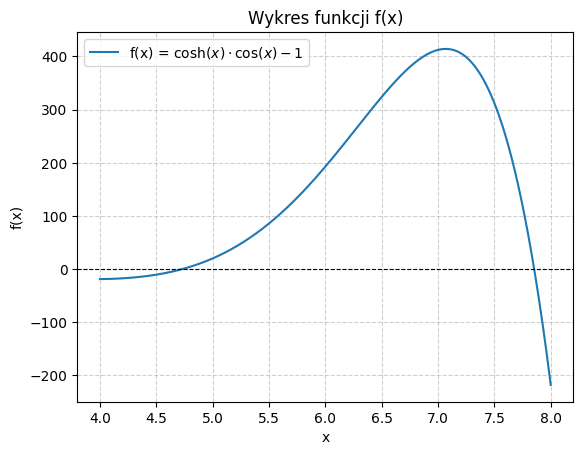

In [21]:
plt.plot(xs, f2(xs), label="f(x) = $\\cosh(x) \\cdot \\cos(x) - 1$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [22]:
def iterative_newton(f, f_prime, f_bis, x_0, max_i_num, tol=1e-8):
    x = x_0 
    for _ in range(max_i_num):
        fx = f(x)
        if abs(fx) < tol:
            return x
        fpx = f_prime(x)
        fbx = f_bis(x)
        u = fx/fpx
        t = fx*fbx/fpx**2
        x -= u * 2/(1 + np.sqrt(1 - 2 * t))
    return x
    
    

In [27]:
x = iterative_newton(f2, f2_prime, f2_bis, 4, 1000)

In [28]:
print(f"Rozwiązanie modyfikowaną iteracyjną metodą Newtona startując od x0 = 4\nx = {x}")

Rozwiązanie modyfikowaną iteracyjną metodą Newtona startując od x0 = 4
x = 4.730040744862704


In [33]:
x = newton(f2, f2_prime, 4, 1000)[0]

In [34]:
print(f"Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 4\nx = {x}")

Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 4
x = 10.995607838001671


Zadanie 3

In [35]:
f3 = lambda x: 2510 * np.log(2.8 * 10 ** 6 / (2.8 * 10 ** 6 - 13.3 * 10**3 * x)) - 9.81 * x - 335
f3_prime = lambda x: 2510 / (210.526 - x) - 9.81

In [38]:
t = newton(f3, f3_prime, 60, 1000)[0]

In [39]:
print(f"Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 60\nt = {t}")

Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 60
t = 70.87797226808371


Zadanie 4

In [40]:
f4 = lambda x: -8.31441 * x * np.log((x /  4.44418) ** (2.5)) + 10**5
f4_prime = lambda x: 10.2183 - 8.31441 * np.log(x ** (2.5))

In [41]:
T = newton(f4, f4_prime, 900, 1000)[0]

In [42]:
print(f"Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 900\nT = {T}")

Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 900
T = 904.9425832328805


Zadanie 5

In [43]:
def newton_nonlinear(F, F_prime, x_0, max_i_num, tol):
    x = x_0
    for _ in range(max_i_num):
        Fx = F(x)
        if np.linalg.norm(Fx) < tol:
            return x
        Fpx = F_prime(x)
        delta_x = np.linalg.solve(Fpx, -Fx)
        x = x + delta_x.flatten()
    return x
    

In [44]:
F = lambda x: np.array([np.tan(x[0]) - x[1] - 1, np.cos(x[0]) - 3 * np.sin(x[1])])

In [45]:
F_prime = lambda x: np.matrix([[1/np.cos(x[0])**2, -1], [-np.sin(x[0]), -3*np.cos(x[1])]])

In [49]:
x, y = newton_nonlinear(F,F_prime, [0,0], 1000, 1e-8)
print(f"Rozwiązanie za pomocą metody Newtona:\nx={x}\ny={y}")

Rozwiązanie za pomocą metody Newtona:
x=0.8815925944959518
y=0.2135947145716599


In [50]:
from scipy.optimize import fsolve

def equations(vars):
    x, y = vars
    eq1 = np.tan(x) - y - 1
    eq2 = np.cos(x) - 3*np.sin(y)
    return [eq1, eq2]

initial_guess = [0,0]
x, y = fsolve(equations, initial_guess)
print(f"Rozwiązanie za pomocą wbudowanej metody fsolve:\nx={x}\ny={y}")

Rozwiązanie za pomocą wbudowanej metody fsolve:
x=0.8815925944959405
y=0.21359471457166196


In [51]:
y1 = lambda x: np.tan(x) - 1
y2 = lambda x: np.arcsin(np.cos(x)/3)
xs = np.linspace(0, 1.5,1000)

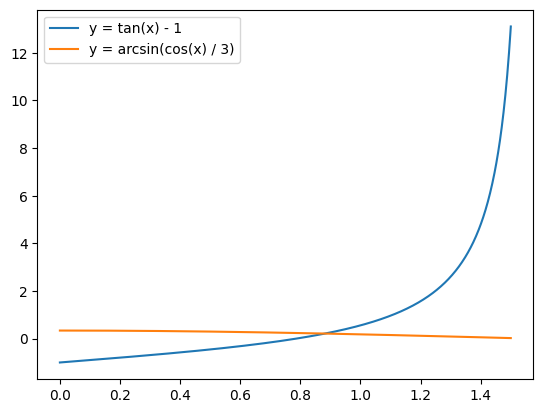

In [52]:
plt.plot(xs, y1(xs), label="y = tan(x) - 1")
plt.plot(xs, y2(xs), label="y = arcsin(cos(x) / 3)")
plt.legend(loc="best")
plt.show()

Zadanie 6

In [61]:
def laguerre(w, x_0, n, max_i_num, tol):
    x = x_0
    w_prime = np.polyder(w, 1)
    w_bis = np.polyder(w, 2)
    for _ in range(max_i_num):
        wx = w(x)
        if abs(wx) < tol:
            return x
        wpx = w_prime(x)
        wbx = w_bis(x)
        G = wpx / wx
        H = G ** 2 - wbx / wx
        a1 = n / (G + np.sqrt((n-1) * (n * H - G ** 2)))
        a2 = n / (G - np.sqrt((n-1) * (n * H - G ** 2)))
        a = min(a1, a2)
        x -= a
    return x
        
        

In [62]:
w = np.poly1d([1, 5+1j, -8+5j, 30-14j, -84])

In [63]:
r = laguerre(w, 0, 4, 1000, 1e-8)

In [64]:
def all_x(w, x_0, n, max_i_num, tol, x_num):
    xs = []
    for i in range(x_num):
        res = laguerre(w, x_0, n, max_i_num, tol)
        xs.append(res)
        p = np.poly1d([1,-res])
        w = np.polydiv(w, p)[0]
        n -= 1
    return xs

In [65]:
xs = all_x(w, 0, 4, 1000, 1e-8, 4)
print("Znalezione pierwiastki to:")
for i,x in enumerate(xs):
    print(f"x{i+1} = {x}")

Znalezione pierwiastki to:
x1 = (2.000000000006474+1.1957957410727027e-12j)
x2 = (-4.487046584983334e-12+2.0000000000030282j)
x3 = (-1.3211931548829426e-12-3.00000000000385j)
x4 = (-7.000000000000665-3.743672039036028e-13j)
